Script to explore the complexity measures of NERC GIC data:
- Burst size
- Burst duration

TODO
- how to handle the fact that GICs are positive and negative (simple absolute value? right now I'm only getting the positive events)
- determine physically meaningful values for thresholds of GIC and durations

## Background

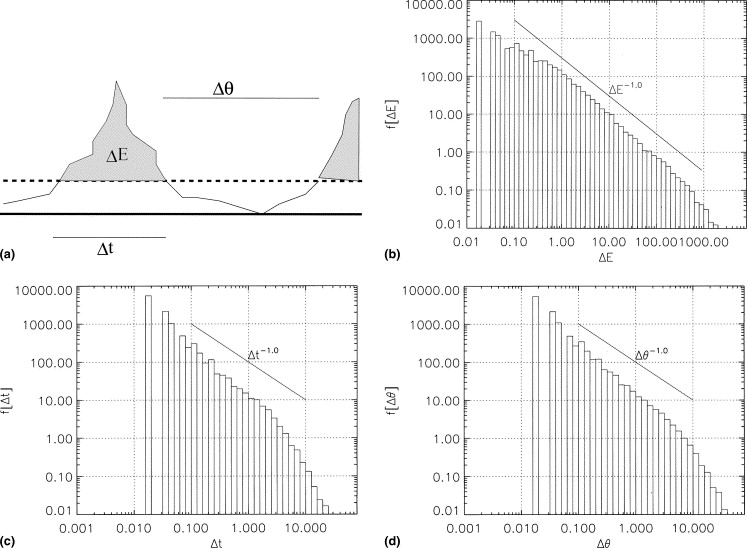



Fig. 3. Upper right. Schematic description of the intermittent dissipation used in the construction of the event distributions. Upper left. The distribution of the “energy” dissipated, ΔE, during the event. Lower right. The distribution of the event duration, Δt. Lower left. The distribution of the time between events, Δθ. Using a threshold value of −AL > 100 nT to define an event, we obtain N = 10365 events. The distributions are constructed by counting the number of events Ni in exponentially increasing bins, but normalized by the exponentially increasing size of the bin, i.e., a normalized . A probability of events is constructed by dividing by The effective number of events in a given bin is finally obtained by multiplying by the total number of events. Note that there are bins for which there are less that one effective event, and this measure can be taken as an indication that this particular bin is not statistically significant. The variation of some of the parameters does not change the results significantly. Time values are in minutes.




From [Valdivia et al., 2005](https://www.sciencedirect.com/science/article/pii/S0273117705004977)

## Dependencies

In [85]:
import numpy as np
import pandas as pd
import glob
import os

import datetime

## Read in the integrated data

In [87]:
integrated_data_directory = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/'
files = glob.glob( os.path.join(integrated_data_directory,'*.csv') )
files

['/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150919.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150317.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20151220.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20130531.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20210512.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20131002.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20170927.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150622.csv',
 '/Users/ryanmc/Documents/Conferences/Ja

In [88]:
for f in files[0:1]:
    print(f)
    df = pd.read_csv(f,index_col=False)
    df = df.drop(columns='Unnamed: 0')

/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150919.csv


In [89]:
df

,datetimes,10200,10214,10412,10406,10189,10188,10361,10407,10413,...,Vx,Vy,Vz,YR,flow_speed,percent_interp,proton_density,x,y,z
0,2015-09-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-451.1,-6.2,12.2,2015.0,451.3,100.0,7.54,222.67,1.13,-23.61
1,2015-09-19 00:00:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-09-19 00:00:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-09-19 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-09-19 00:00:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28723,2015-09-21 23:59:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28724,2015-09-21 23:59:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28725,2015-09-21 23:59:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28726,2015-09-21 23:59:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import matplotlib.pyplot as plt

def visualize_dataframe_columns(df):
    fig, axs = plt.subplots(len(df.columns), 1, figsize=(6, 1.5*len(df.columns)))
    
    for i, col in enumerate(df.columns):
        axs[i].plot(df[col])
        axs[i].set_ylabel(col, rotation=0, labelpad=20, fontsize=10)
        axs[i].set_yticklabels([])
        axs[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    plt.tight_layout()
    plt.show()


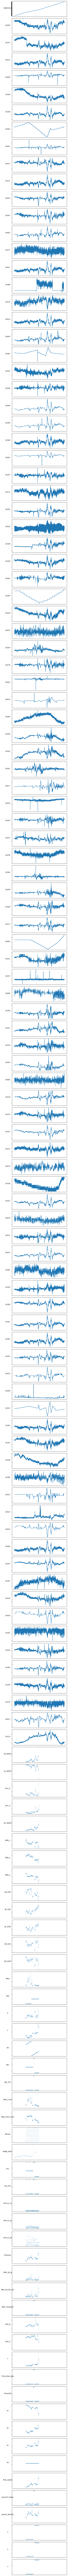

In [19]:
visualize_dataframe_columns(df)

## Calculate burst sizes, durations, and intermittencies

In [90]:
import numpy as np
import pandas as pd
from scipy.integrate import trapz

def calculate_event_properties(time_series, threshold, window_size):
    events = []
    start_idx = None
    area_under_curve = 0
    time_between_events = []
    event_durations = []

    for i, value in enumerate(time_series):
        if value > threshold:
            if start_idx is None:
                start_idx = i
            area_under_curve += value - threshold
        elif start_idx is not None:
            if i - start_idx >= window_size:
                events.append(area_under_curve)
                time_between_events.append(i - start_idx)
                event_durations.append(i - start_idx + 1)  # Duration includes the start and end points
            start_idx = None
            area_under_curve = 0

    # Convert time_between_events and event_durations to pandas Series for easy analysis
    time_between_events = pd.Series(time_between_events)
    event_durations = pd.Series(event_durations)

    return events, time_between_events, event_durations


In [136]:
import numpy as np
import pandas as pd
from scipy.integrate import trapz

def calculate_event_properties(time_series, datetimes, threshold, min_consecutive_steps):
    event_ctr = 0
    event_start_idxs = []
    event_end_idxs = []
    event_start_times = []
    event_end_times = []
    event_sizes = []
    event_durations = []
    event_betweendistances = []
    start_idx = None
    end_idx = None
    area_under_curve = 0
#     event_duration = 0
#     event_distance = 0



    for i, value in enumerate(time_series):
        if value > threshold:
            if start_idx is None:
                start_idx = i
#             area_under_curve += value - threshold
#             event_duration += 1
        elif start_idx is not None:
            if end_idx is None:
                end_idx = i
#             event_duration += 1
            if i - end_idx >= min_consecutive_steps:
                event_ctr += 1
            
                event_start_idxs.append(start_idx)
                event_end_idxs.append(end_idx)
                event_start_times.append(datetimes.values[start_idx])
                event_end_times.append(datetimes.values[end_idx])

                # convert durations from indices to times
                event_duration_time = ( pd.to_datetime(datetimes.values[end_idx]).to_pydatetime() -  pd.to_datetime(datetimes.values[start_idx]).to_pydatetime()  ).seconds

                if event_ctr == 1:
                    event_betweendistance_time = np.nan
                else: 
                    #difference between the start of the current event and the end of the previous event 
                    event_betweendistance_time = ( pd.to_datetime(datetimes.values[ event_start_idxs[event_ctr-1] ]).to_pydatetime() -  pd.to_datetime(datetimes.values[ event_end_idxs[event_ctr-2] ]).to_pydatetime()  ).seconds
                


                event_durations.append(event_duration_time)
                event_betweendistances.append(event_betweendistance_time)
                
                # calculate the area under the event curve
                time_series_event = time_series.values[start_idx:end_idx]
                elaptimes_event = [(timestamp - pd.to_datetime(datetimes.values[start_idx]) ).total_seconds() for timestamp in pd.to_datetime(datetimes.values[start_idx:end_idx]) ]
                valid_indices = np.isfinite(time_series_event)
                elaptimes_valid = np.array(elaptimes_event)[valid_indices]
                time_series_valid = time_series_event[valid_indices]
                
#                 np.trapz(timeseries_valid[start_idx:end_idx], elaptimes_valid[start_idx:end_idx])
                area_under_curve = trapz(time_series_valid-threshold, 
                                         elaptimes_valid)
                event_sizes.append(area_under_curve)
                
#                 event_sizes.append(area_under_curve / event_duration)
                
                start_idx = None
                end_idx = None
                area_under_curve = 0
                event_duration_time = 0
                event_betweendistance_time = 0 
                elaptimes = []
                valid_indices = []
                elaptimes_valid = []
                time_series_event = []
                time_series_valid = []
                
#                 event_distance = 0

#     # Convert the lists to pandas Series for easy analysis
#     events = pd.Series(events)
#     event_sizes = pd.Series(event_sizes)
#     event_durations = pd.Series(event_durations)
#     event_distances = pd.Series(event_distances)

    # convert to DF for easy analysis
    df_out = pd.DataFrame(columns=[#'event id',
                                   'event_start_idxs',
                                   'event_end_idxs',
                                   'event_start_times',
                                   'event_end_times',
                                   'event_sizes',
                                   'event_durations',
                                   'event_betweendistances'])
#     df_out['event id'] = event_ctr
    df_out['event_start_idxs'] = event_start_idxs
    df_out['event_end_idxs'] = event_end_idxs
    df_out['event_start_times'] = event_start_times
    df_out['event_end_times'] = event_end_times
    df_out['event_sizes'] = event_sizes
    df_out['event_durations'] = event_durations
    df_out['event_betweendistances'] = event_betweendistances
    

    return df_out
#     return events, event_start_idxs, event_end_idxs, event_sizes, event_durations, event_betweendistances


In [117]:
np.array(elaptimes)[valid_indices]

array([ 64800.,  64800.,  64810., ..., 151180., 151190., 151200.])

In [118]:
elaptimes = [(timestamp - pd.to_datetime(df['datetimes'].values[0]) ).total_seconds() for timestamp in pd.to_datetime(df['datetimes'].values) ]
elaptimes
valid_indices = np.isfinite(df['10075'].values)
elaptimes_valid = np.array(elaptimes)[valid_indices]
timeseries_valid = df['10075'].values[valid_indices]
np.trapz(timeseries_valid, elaptimes_valid)

150789.1

In [119]:
print(len(elaptimes))
print(len(elaptimes_valid))


28728
11448


In [137]:
threshold = 0.2
window_size = 10 # must exceed threshold for 10 consecutive time steps
min_consecutive_steps = 6 # must fall below threshold for six consecutive time steps to distinguish events
# events, event_start_idxs, event_end_idxs, event_sizes, event_durations, event_betweendistances = calculate_event_properties(df['10075'], df['datetimes'], threshold, min_consecutive_steps)
df_out = calculate_event_properties(df['10075'], df['datetimes'], threshold, min_consecutive_steps)





In [138]:
df_out

,event_start_idxs,event_end_idxs,event_start_times,event_end_times,event_sizes,event_durations,event_betweendistances
0,6480,6560,2015-09-19 18:00:00,2015-09-19 18:08:50,878.30,530,NaN
1,6567,6613,2015-09-19 18:09:30,2015-09-19 18:14:30,632.30,300,40.0
2,6734,6838,2015-09-19 18:26:50,2015-09-19 18:37:50,1007.85,660,740.0
3,6846,7030,2015-09-19 18:38:30,2015-09-19 18:58:30,2152.90,1200,40.0
4,7055,7274,2015-09-19 19:00:40,2015-09-19 19:22:30,3377.30,1310,130.0
...,...,...,...,...,...,...,...
116,17246,17275,2015-09-20 16:06:30,2015-09-20 16:11:20,329.90,290,390.0
117,17310,17511,2015-09-20 16:17:10,2015-09-20 16:50:40,4360.05,2010,350.0
118,17526,17542,2015-09-20 16:53:10,2015-09-20 16:55:50,179.55,160,150.0
119,17549,17737,2015-09-20 16:57:00,2015-09-20 17:28:20,4808.60,1880,70.0


In [ ]:
plt.figure()
plt.plot(#df['datetimes'],
         df['10075'])
plt.show()


In [27]:
time_between_events

0       80
1       46
2      119
3      104
4      184
      ... 
158    201
159     16
160    188
161     57
162    122
Length: 163, dtype: int64

In [28]:
for i, value in enumerate(df['10075']):
    print(i,value)

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
134 nan
135 nan
136 nan
137 nan
138 na